In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
seattle_weather = pd.read_csv('DataSets/seattle_weather.csv')
austin_weather = pd.read_csv('DataSets/austin_weather.csv')

In [4]:
# function to change month-number to month-text
def change_to_month_text(month_number):
    if month_number == 1:
        return 'Jan'
    elif month_number == 2:
        return 'Feb'
    elif month_number == 3:
        return 'Mar'
    elif month_number == 4:
        return 'Apr'
    elif month_number == 5:
        return 'May'
    elif month_number == 6:
        return 'Jun'
    elif month_number == 7:
        return 'Jul'
    elif month_number == 8:
        return 'Aug'
    elif month_number == 9:
        return 'Sep'
    elif month_number == 10:
        return 'Oct'
    elif month_number == 11:
        return 'Nov'
    elif month_number == 12:
        return 'Dec'

In [5]:
# Creating a corresponding MONTH column for date
seattle_weather['MONTH'] = seattle_weather['DATE'].apply(change_to_month_text)

In [6]:
# Grouping by DATE column and aggregating the average temperature for each month
seattle_12m = seattle_weather.groupby(by='DATE')[['MONTH', 'MLY-TAVG-NORMAL']].mean()

In [7]:
# Creating a month column to the new dataframe
seattle_12m['MONTH'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]

In [8]:
# Re-arranging column sequence
seattle_12m = seattle_12m[['MONTH', 'MLY-TAVG-NORMAL']]

In [9]:
seattle_12m

,MONTH,MLY-TAVG-NORMAL
DATE,,
1,Jan,40.980000
2,Feb,42.320000
3,Mar,45.693333
4,Apr,49.646667
5,May,55.186667
6,Jun,60.093333
7,Jul,64.733333
8,Aug,65.106667
9,Sep,60.040000


In [10]:
austin_weather['MONTH']= austin_weather['DATE'].apply(change_to_month_text)
austin_weather[['MONTH', 'MLY-TAVG-NORMAL']]

,MONTH,MLY-TAVG-NORMAL
0,Jan,49.2
1,Feb,52.1
2,Mar,59.2
3,Apr,67.3
4,May,75.2
5,Jun,81.0
6,Jul,83.4
7,Aug,83.7
8,Sep,77.8
9,Oct,69.0


In [11]:
seattle_month = seattle_12m['MONTH']
seattle_temp = seattle_12m['MLY-TAVG-NORMAL']
austin_month = austin_weather['MONTH']
austin_temp = austin_weather['MLY-TAVG-NORMAL']

Text(0.5, 1.0, 'Weather Comparison between Seattle and Austin')

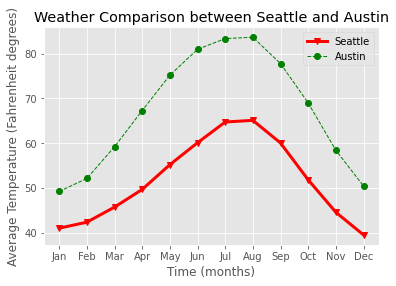

In [18]:
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots()
ax.plot(seattle_month, seattle_temp, label='Seattle', linewidth=3, linestyle='solid', color='red', marker='v')
ax.plot(austin_month, austin_temp, label='Austin', linewidth=1, linestyle='--', color='g', marker='o')
ax.legend()
ax.set_xlabel('Time (months)')
ax.set_ylabel('Average Temperature (Fahrenheit degrees)')
ax.set_title('Weather Comparison between Seattle and Austin')

In [13]:
seattle_12m.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='DATE')

### PLOTTING SMALL MULTIPLES

In [14]:
seattle_12m['MLY-PRCP-NORMAL'] = seattle_weather.groupby(by='DATE')['MLY-PRCP-50PCTL'].mean()

In [15]:
seattle_12m['MLY-PRCP-25PCTL'] = seattle_weather.groupby(by='DATE')['MLY-PRCP-25PCTL'].mean()
seattle_12m['MLY-PRCP-75PCTL'] = seattle_weather.groupby(by='DATE')['MLY-PRCP-75PCTL'].mean()

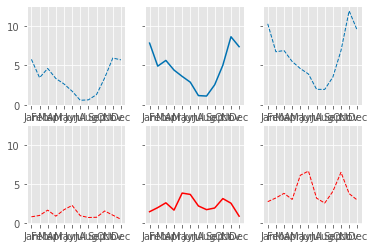

In [19]:
# MLY-PRCP-NORMAL	MLY-PRCP-25PCTL	MLY-PRCP-75PCTL
# MLY-PRCP-25PCTL	MLY-PRCP-50PCTL	MLY-PRCP-75PCTL
fig, ax = plt.subplots(2, 3, sharey=True)
ax[0, 0].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-25PCTL'], linewidth=1, linestyle='--')
ax[0, 1].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-NORMAL'])
ax[0, 2].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-75PCTL'], linewidth=1, linestyle='--')

ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linewidth=1, linestyle='--')
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-50PCTL'], color = 'r')
ax[1, 2].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linewidth=1, linestyle='--')

Text(0.5, 1.0, 'Average Precipitation comparison btwn Seatlle & Austin')

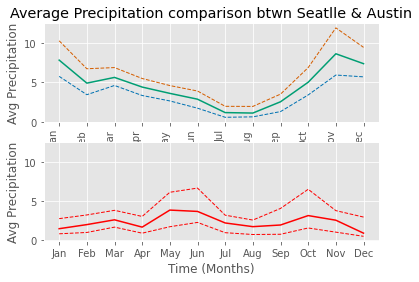

In [20]:
fig, ax_1 = plt.subplots(2, 1, sharey=True)
ax_1[0].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-25PCTL'], linewidth=1, linestyle='--')
ax_1[0].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-NORMAL'])
ax_1[0].plot(seattle_12m['MONTH'], seattle_12m['MLY-PRCP-75PCTL'], linewidth=1, linestyle='--')

ax_1[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linewidth=1, linestyle='--')
ax_1[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-50PCTL'], color = 'r')
ax_1[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linewidth=1, linestyle='--')

ax_1[1].set_xlabel('Time (Months)')
# ax_1[0].set_xticks([])
ax_1[0].set_xticklabels(seattle_12m['MONTH'], rotation=90, ha='right')
ax_1[0].set_ylabel('Avg Precipitation')
ax_1[1].set_ylabel('Avg Precipitation')
ax_1[0].set_title('Average Precipitation comparison btwn Seatlle & Austin')